***************************************************************************************

#### GROUP MEMBERS: 1. GUNJAN PANDA (MT22099) 2. PRAGYA YADAV (MT22116) 3. SHUBHANGI AGRAWAL (MT22126)
#### SUBJECT: MACHINE LEARNING
### TOPIC : Gaining insights from restaurant aggregator(s) to predict a restaurant’s performance

***************************************************************************************


### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

### Reading the dataset into a dataframe "df"

In [ ]:
df = pd.read_csv(r'C:\Users\prgya\Documents\ML\zomato.csv',sep=',')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Understanding the Data

***This dataset has been taken from Kaggle which contains information regarding the restaurants in Bangalore that were fetched using web scraping in March, 2019 and later published on Kaggle. The data was fetched from the zomato website to gain insights from the restaurants already open in Bangalore and how they perform, to further predict the performance of a new restaurant that one can open in Bangalore, based on various parameters.***

Features extracted from the website to explore the data further are as below ➡
* url: url of the restaurant in the zomato website
* address: address of the restaurant in Bangalore
* name: restaurant name
* online_order: restaurant takes/doesn't take online orders
* book-table: restaurants have/don't have the facility to book tables
* rate: overall rating of the restaurant out of 5
* votes: number of votes by customer for each restaurant
* phone: phone number of the restaurant
* location: neighborhood in which the restaurant is located
* rest-type: restaurant type
* dish_liked: dish of a restaurant liked by people
* cuisines: cuisines served in restaurants
* approx_cost(for two people): approximate cost for two at a restaurant
* reviews_list: list of reviews by customers
* menu_item: items in menu of a restaurant
*	listed_in(type): what kind of restaurant is it
* listed_in(city): city where restaurant is located

### Dimensions of the Data

In [ ]:
# shape of data:- data has 51717 rows & 17 features as of now
df.shape

(51717, 17)

### Information regarding the features in dataset, its type & Non-Null counts

*Non-Null counts tell us the datapoints present for each feature. All the features collected in dataset are in String format except for votes, as we can see below in the Non-Null section, out of 29999 datapoints some of the features have some null entries which we will deal with later*

In [ ]:
# info regarding features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Dropping the unnecessary features from dataset
*As below features won't contribute in predicting the performance of a new restaurant, so we will drop these from our dataset*

In [ ]:
# dropping unwanted features from dataset
df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1,inplace=True)

### List of the features to be used for further analysis

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Data Pre-processing
*Dropping duplicate rows from dataset below to get cleaner data for better model prediction*

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

### Reading each feature & cleaning it, if required

### Cleaning Rate Feature

*rate feature:- ratings given by customers should lie in a range between 0 - 5* 


In [ ]:
# unique values of rate feature
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Removing Nan and unknown strings from the "rate" column
*Rate should have a **rating from 0-5**, but our data has some string values like **'NEW' & '-'**. Also, instead of being in ratio format we will only store the rating in float format( which will be a rating of the restaurant varying from 0-5 )*

### Cleaning Rate Feature

***clean_rate function :-***
1. We will use it to clean the rates as per our requirement
2. Replace string values with nan & later treat the missing values
3. Removing unnecessary symbols like '/'

In [ ]:
# function to clean the rates as per our requirement
def clean_rate(rate):
    if(rate=='NEW' or rate=='-'):
        return np.nan # replace string with nan & later treat the missing values
    else:
        rate = str(rate).split('/') #as we only need the rating not /5 part
        rate = rate[0]
        return rate

In [ ]:
# clean rate:- converted rate to float value
df['rate'] = df['rate'].apply(clean_rate)
df['rate'] = df['rate'].astype(float)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### Missing Value Analysis

*Missing Proportion in Data*

In [ ]:
# tells us what percentage of entries are missing for each feature
missing_data_percentage = df.isnull().sum()*100 / len(df)
missing_vals = pd.DataFrame({'Variables':df.columns,'Missing_Data_Percentage':missing_data_percentage})
missing_vals.sort_values('Missing_Data_Percentage',inplace=True)
missing_vals

,Variables,Missing_Data_Percentage
name,name,0.000000
online_order,online_order,0.000000
book_table,book_table,0.000000
votes,votes,0.000000
listed_in(type),listed_in(type),0.000000
listed_in(city),listed_in(city),0.000000
location,location,0.040691
cuisines,cuisines,0.087194
rest_type,rest_type,0.439846
approx_cost(for two people),approx_cost(for two people),0.666550


***As from above we can see, rate has a significant number of missing values so we will impute these by filling the missing entries with the median of rates***



In [ ]:
# impute missing rates
df['rate'].fillna(df['rate'].median(),inplace=True)
# no missing values left for rate now
df['rate'].isnull().sum()

0

*As other features have very less number of missing values so we will drop these*



In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


### Renaming columns for better readability

In [ ]:
# renaming columns for better readability
df.rename(columns={'name':'Restaurant_Name','online_order':'Online_Order','book_table':'Book_Table','rate':'Rating','votes':'Vote_Count','location':'Location','rest_type':'Restaurant_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost_For_Two','listed_in(type)':'Type','listed_in(city)':'City'},inplace=True)
df.head()
name_df = df

### Checking unique values of Location & City features

In [ ]:
# locations where restaurants are present
df['Location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
# cities where restaurants are present
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

***As location feature serves the purpose for city, so we will drop city from dataset below***

In [ ]:
# drop city from dataset
df.drop('City',axis=1,inplace=True)
df.columns

Index(['Restaurant_Name', 'Online_Order', 'Book_Table', 'Rating', 'Vote_Count',
       'Location', 'Restaurant_Type', 'Cuisines', 'Cost_For_Two', 'Type'],
      dtype='object')

### Cleaning CostForTwo feature

In [ ]:
# unique values of costfortwo feature
df['Cost_For_Two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

***clean_cost function :-***

1. We will use it to clean costfortwo as per our requirement
2. Replace ' , ' with ' '
3. Convert from String type to numeric type i.e float

In [ ]:
# cleaning costfortwo
def clean_cost(cost):
  cost = str(cost)
  if ',' in cost:
    cost = cost.replace(',','')
    return cost
  else:
    return cost

In [ ]:
# clean costfortwo
df['Cost_For_Two'] = df['Cost_For_Two'].apply(clean_cost)
df['Cost_For_Two'] = df['Cost_For_Two'].astype(float)
df['Cost_For_Two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

### Cleaning Restaurant Type feature

In [ ]:
# count restaurant types
restType = df['Restaurant_Type'].value_counts(ascending=False)
restType

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: Restaurant_Type, Length: 93, dtype: int64

***As there are some categories that have very few restaurants, so we will club all such restaurants into one category i.e Others***


In [ ]:
# club all restaurants of a particular category having count < 100
restType_less_than_100 = restType[restType<100]
restType_less_than_100

Dessert Parlor, Bakery           85
Quick Bites, Dessert Parlor      84
Food Truck                       84
Pub, Microbrewery                83
Dessert Parlor, Beverage Shop    80
Beverage Shop, Dessert Parlor    79
Bakery, Cafe                     78
Quick Bites, Sweet Shop          75
Quick Bites, Bakery              60
Casual Dining, Microbrewery      47
Microbrewery, Pub                42
Confectionery                    42
Quick Bites, Cafe                41
Pub, Cafe                        40
Dhaba                            40
Pub, Bar                         40
Fine Dining, Bar                 39
Lounge, Casual Dining            37
Lounge, Bar                      36
Club                             36
Microbrewery                     30
Beverage Shop, Cafe              28
Cafe, Bar                        19
Quick Bites, Food Court          19
Bakery, Beverage Shop            16
Lounge, Cafe                     16
Lounge, Microbrewery             16
Casual Dining, Irani Cafee  

***clean_rest_type function :-***

1. We will use it to clean the restaurant types as per our requirement
2. Club all categories that have very few restaurant i.e <100 into one category i.e "Others"

In [ ]:
# club all restaurants of a particular category having count < 100 into Others
def clean_rest_type(resttype):
  if(resttype in restType_less_than_100):
    return 'Others'
  else:
    return resttype

In [ ]:
# clean restaurant type
df['Restaurant_Type'] = df['Restaurant_Type'].apply(clean_rest_type)
df['Restaurant_Type'].value_counts()

Quick Bites                    19010
Casual Dining                  10253
Cafe                            3682
Delivery                        2574
Dessert Parlor                  2242
Takeaway, Delivery              2008
Others                          1485
Bakery                          1140
Casual Dining, Bar              1130
Beverage Shop                    863
Bar                              686
Food Court                       616
Sweet Shop                       468
Bar, Casual Dining               411
Lounge                           395
Pub                              355
Fine Dining                      345
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     163
C

### Cleaning Location Feature

***As there are some localities that don't have alot of restaurants, so we will club all such restaurants into one category i.e Others***


In [ ]:
# club all locations having restaurants < 100
loc = df['Location'].value_counts(ascending=False)
loc_less_than100 = loc[loc<100]
loc_less_than100

Hosur Road              98
CV Raman Nagar          89
Vijay Nagar             78
RT Nagar                78
Sanjay Nagar            76
Sadashiv Nagar          63
Sahakara Nagar          53
Koramangala             48
East Bangalore          43
Jalahalli               38
Magadi Road             34
Rammurthy Nagar         32
Langford Town           27
Sankey Road             27
Old Madras Road         22
Mysore Road             22
Kanakapura Road         19
KR Puram                18
Uttarahalli             17
Hebbal                  14
North Bangalore         14
Nagarbhavi               9
Kengeri                  8
Central Bangalore        8
West Bangalore           6
Yelahanka                5
Jakkur                   3
Rajarajeshwari Nagar     2
Peenya                   1
Name: Location, dtype: int64

***clean_loc function :-***

1. We will use it to clean the location as per our requirement
2. Club all localities that have very few restaurants i.e <100 into one category i.e "Others"

In [ ]:
# club all locations having restaurants < 100 into Others
def clean_loc(loc):
  if(loc in loc_less_than100):
    return 'Others'
  else:
    return loc

In [ ]:
# clean location
df['Location'] = df['Location'].apply(clean_loc)
df['Location'].value_counts()

BTM                              5056
HSR                              2494
Koramangala 5th Block            2479
JP Nagar                         2218
Whitefield                       2105
                                 ... 
ITPL Main Road, Whitefield        113
Varthur Main Road, Whitefield     109
South Bangalore                   107
Koramangala 2nd Block             102
Kaggadasapura                     101
Name: Location, Length: 65, dtype: int64

### Analysing Type feature:-

***It is the type of service provided by a restaurant, as for each type of service there are a significant amount of restaurants open, so we don't need to make any changes to this feature***

In [ ]:
# As each type has significant number of count so no modification required
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

***Now that we have the cleaned data, we have preprocessed every feature of the data, we have a more refined data which we will now use to visualize the data.***

***Below is the pre-processed data, Have a Look!***

### Pre-Processed Data

In [ ]:
df.head()

,Restaurant_Name,Online_Order,Book_Table,Rating,Vote_Count,Location,Restaurant_Type,Cuisines,Cost_For_Two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


### Distribution of numeric data

In [ ]:
df.describe()

,Rating,Vote_Count,Cost_For_Two
count,51042.000000,51042.000000,51042.000000
mean,3.701397,284.507700,555.782983
std,0.395197,805.927478,439.293333
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  51042 non-null  object 
 1   Online_Order     51042 non-null  object 
 2   Book_Table       51042 non-null  object 
 3   Rating           51042 non-null  float64
 4   Vote_Count       51042 non-null  int64  
 5   Location         51042 non-null  object 
 6   Restaurant_Type  51042 non-null  object 
 7   Cuisines         51042 non-null  object 
 8   Cost_For_Two     51042 non-null  float64
 9   Type             51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


***As it can be inferred from above, we have 29646 datapoints that have been now cleaned for each feature, where 7 features are categorical & 3 features are numerical.***

***Let's head on to visualize the pre-processed data!***

### Top-20 Restaurants in Bangalore that are in High Demand

In [ ]:
# Count of number of outlets each restaurant has in Bangalore
df['Restaurant_Name'].value_counts().head(20)

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Domino's Pizza       60
Sweet Truth          60
KFC                  60
Beijing Bites        60
Subway               60
McDonald's           59
Smoor                59
Faasos               57
Chef Baker's         56
Lassi Shop           56
Name: Restaurant_Name, dtype: int64

### Visualizing Top-20 restaurants in Bangalore that have multiple chains

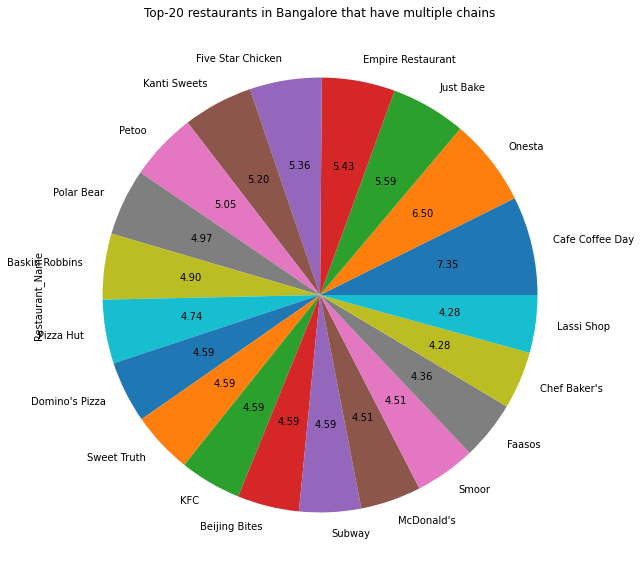

In [ ]:
plt.figure(figsize=(16,10))
ax = df['Restaurant_Name'].value_counts().head(20).plot(kind='pie',autopct='%.2f')
plt.title("Top-20 restaurants in Bangalore that have multiple chains")
plt.show()

### Visualizing number of restaurants open in different localities in Bangalore

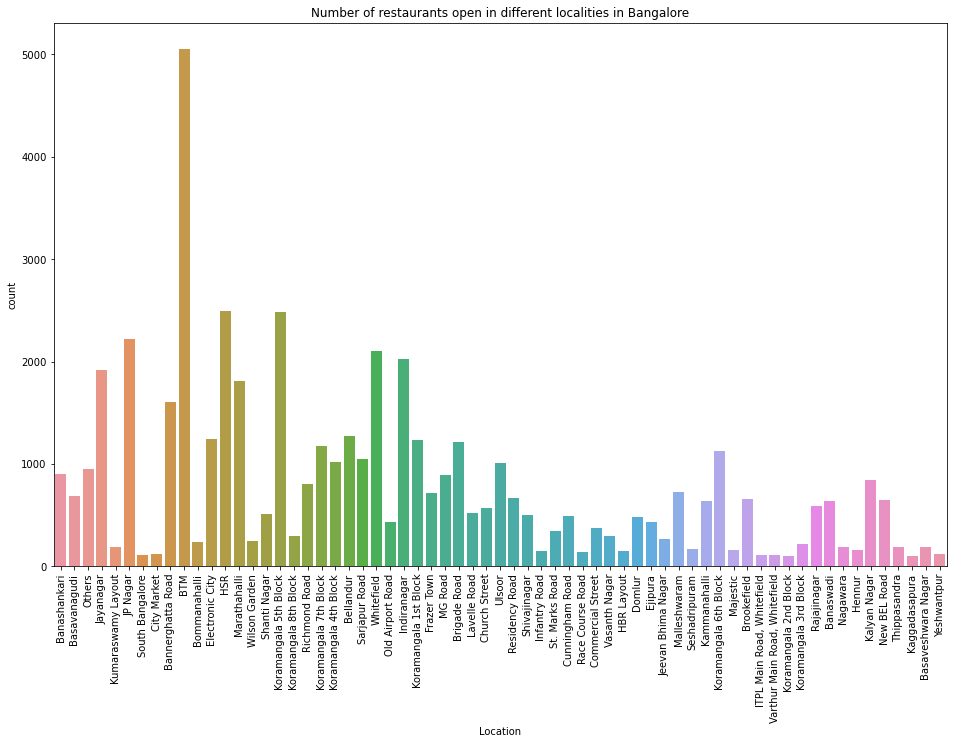

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.countplot(df['Location'])
plt.title("Number of restaurants open in different localities in Bangalore")
plt.xticks(rotation = 90)
plt.show()

***As we can see from above, maximum restaurants are open in BTM, so naturally it will attract more crowd, so a new restaurant can be launched in this locality for better business, but there will be huge competition.***

### Visualizing Top 10 Cuisines in Bangalore Restaurants

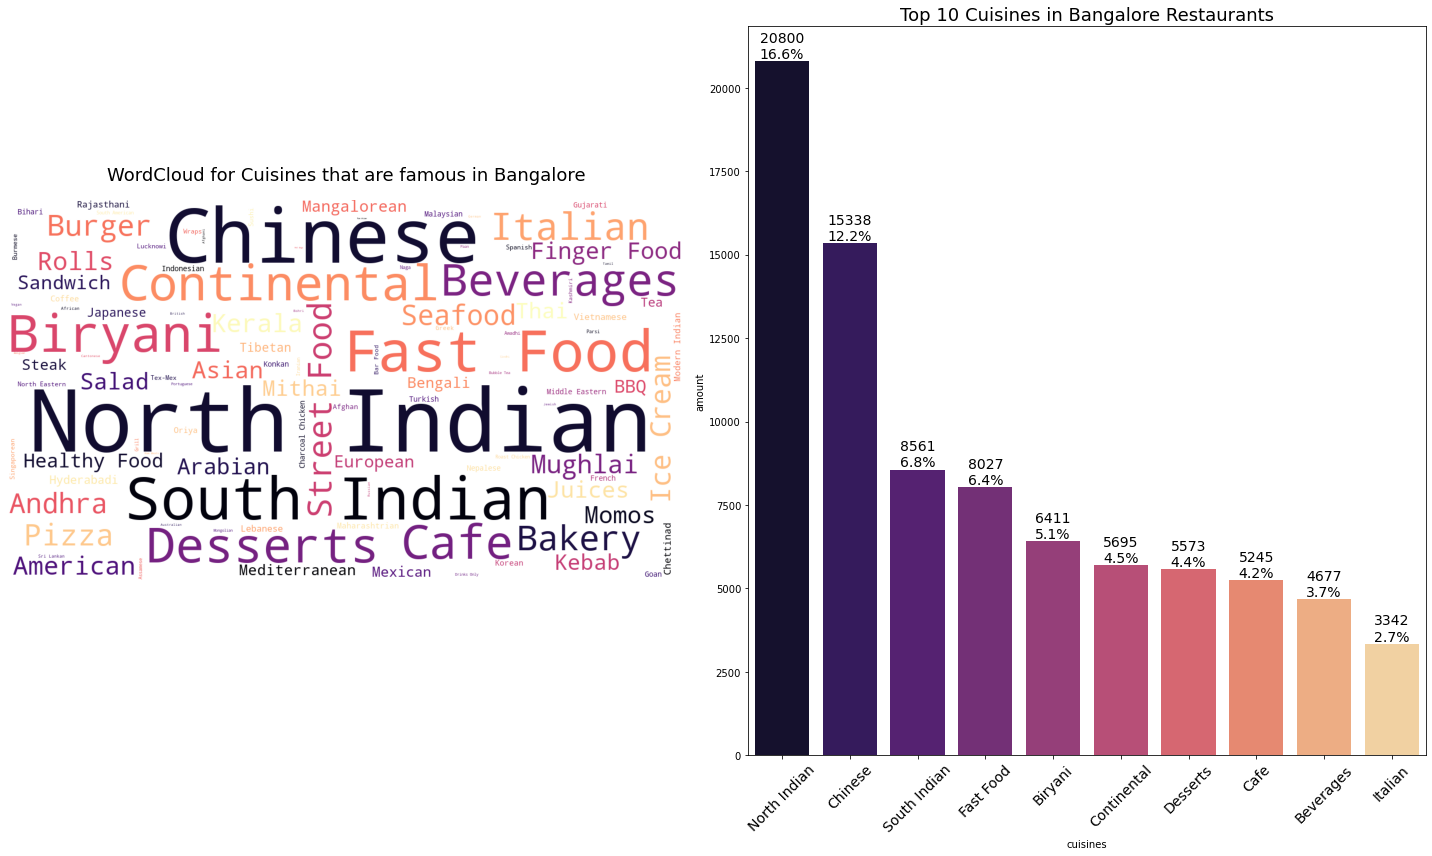

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Creating a list with all options available
cuisines = list(df['Cuisines'].astype(str).values)
cuisines_word_list = []
for lista in [c.split(',') for c in cuisines]:
    for word in lista:
        cuisines_word_list.append(word.strip())
        
# Creating a Counter for unique options and generating the wordcloud
cuisines_wc_dict = Counter(cuisines_word_list)

wordcloud = WordCloud(width=1280, height=720, collocations=False, random_state=42, 
                      colormap='magma', background_color='white').generate_from_frequencies(cuisines_wc_dict)

# Visualizing the WC created and the total for each cuisine
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('WordCloud for Cuisines that are famous in Bangalore', size=18, pad=20)

# Total for each cuisine
df_cuisines = pd.DataFrame()
df_cuisines['cuisines'] = cuisines_wc_dict.keys()
df_cuisines['amount'] = cuisines_wc_dict.values()
df_cuisines.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='cuisines', y='amount', data=df_cuisines.head(10), palette='magma', ax=ax2)
ax2.set_title('Top 10 Cuisines in Bangalore Restaurants', size=18)

# Customizing chart
ncount = df_cuisines['amount'].sum()
x_ticks = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels(x_ticks, rotation=45, fontsize=14)
for p in ax2.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax2.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), fontsize=14, ha='center', va='bottom')

plt.tight_layout()
plt.show()

***The plot above shows the Top 10 cuisines served by restaurants in Bangalore. We can see that the cuisine most served is ‘North Indian’. The population residing in Bangalore accounts for a majority relocating from Northern India for studies, job, businesses away from home which are the most dependent on restaurant food. This could fetch such restaurants more profit due to its high demand.***

### Visualizing Type of restaurants that people in Bangalore opt for

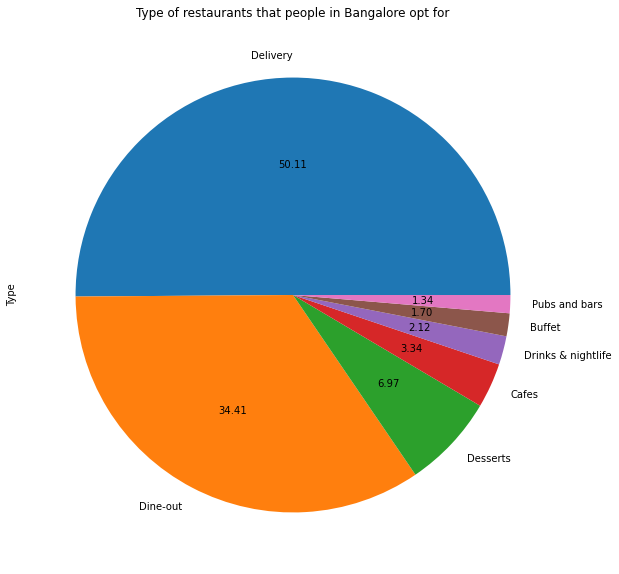

In [ ]:
plt.figure(figsize=(16,10))
ax = df['Type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Type of restaurants that people in Bangalore opt for")
plt.show()

***As we can see from the pie chart above, Restaurants that have delivery service are in High Demand in Bangalore, followed by Dine-Out type of restaurants.***

### Visualizing Cost for two at different restaurants

Text(0.5, 1.0, 'Cost for two at different restaurants')

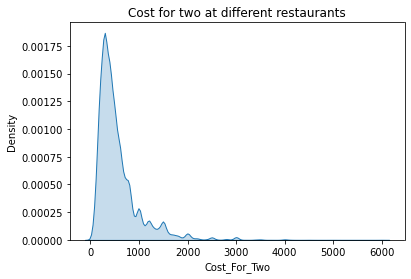

In [ ]:
sns.kdeplot(df['Cost_For_Two'],shade=True)
plt.title("Cost for two at different restaurants")

***As we can see from the distribution above, the average cost for two for majority of the restaurants is somewhere around Rs. 500-600***

### Visualizing Rating Vs Restaurants that take/don't take online orders

Text(0.5, 1.0, "Rating Vs Restaurants that take/don't take online orders")

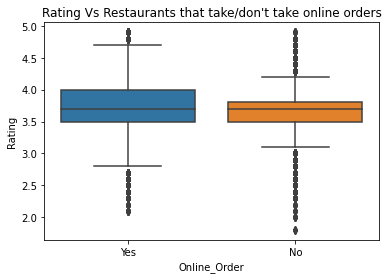

In [ ]:
sns.boxplot(df['Online_Order'],df['Rating'])
plt.title("Rating Vs Restaurants that take/don't take online orders")

*Restaurants that have the **facility to order online** have a **maximum rating around 4.7** while restaurants that **don't have such facility** have a **maximum rating around 4.2**, which means people prefer restaurants that have online booking facility more.*

### Visualizing Rating Vs Restaurants that have/don't have the facility of booking tables

Text(0.5, 1.0, "Rating Vs Restaurants that have/don't have the facility of booking tables")

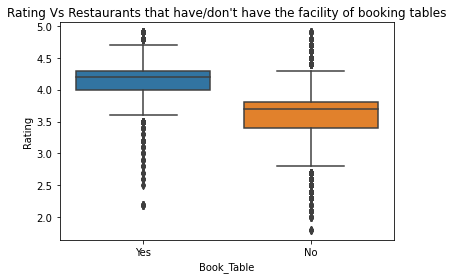

In [ ]:
sns.boxplot(df['Book_Table'],df['Rating'])
plt.title("Rating Vs Restaurants that have/don't have the facility of booking tables")

***From the above plot, it is observed that the restaurants offering the facility of ‘Book_Tables’ have a higher overall rating as compared to the restaurants not offering this facility.***

*Restaurants that **allow to book tables** in advance, have higher average rating i.e around **4.2** than those that **don't allow** i.e around **3.8**.*

### Average Voting & cost for two for different types of restaurants

In [ ]:
# Average Voting & cost for two for different types of restaurants
aggdata = df.groupby(by='Type').agg({'Vote_Count': 'mean','Cost_For_Two':'mean'}).reset_index()
aggdata

,Type,Vote_Count,Cost_For_Two
0,Buffet,1002.906789,1306.559264
1,Cafes,482.418086,627.803876
2,Delivery,204.702373,464.710700
3,Desserts,150.867659,392.433268
4,Dine-out,291.280492,592.373875
5,Drinks & nightlife,1150.704797,1444.972325
6,Pubs and bars,1010.067055,1327.405248


### Visualizing Average Voting & cost for two for different types of restaurants

Text(0.5, 1.0, 'Average Voting & cost for two for different types of restaurants')

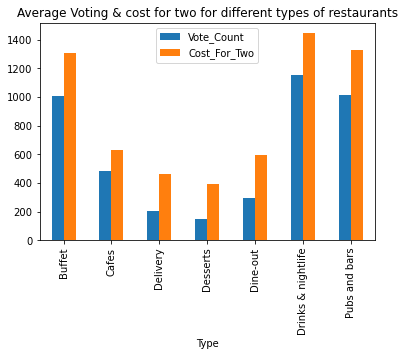

In [ ]:
# Average Voting & cost for two for different types of restaurants
df.groupby(by='Type').agg({'Vote_Count': 'mean','Cost_For_Two':'mean'}).plot(kind='bar')
plt.title("Average Voting & cost for two for different types of restaurants")

***As it can be seen from the plot above, Drinks & Nightlife type of restaurants are the most in demand as they maximum votes but it's costlier as the cost for two is higher than other types. Whereas, desserts have got the lowest votes & has the minimum cost for two as compared to other types.***

### Visualizing the comparison between restaurants that offer different services on the basis on Rating

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

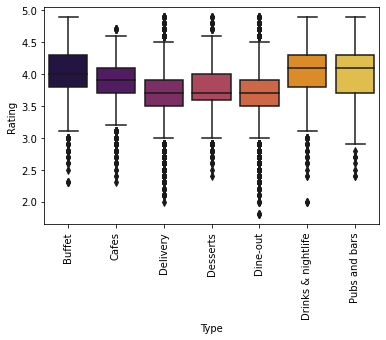

In [ ]:
sns.boxplot(x='Type',y='Rating',data=df,palette='inferno')
plt.xticks(rotation=90)

***From the above plot, Buffet, Drinks & Nightlife, Pubs & bars types of restaurants have a maximum rating of 4.8 & average rating of 4, so these are the most popular kind of restaurants that people prefer going to.***

### Comparison between number of different types of restaurants each locality has

In [ ]:
# Count of different types of restaurants each location has
loc_based_rest = df.groupby(by=['Location','Type'])['Restaurant_Name'].count()
loc_based_rest.to_csv('LocBasedRest.csv')
loc_based_rest = pd.read_csv('LocBasedRest.csv')
loc_based_rest = pd.pivot_table(loc_based_rest,values=None,index=['Location'],columns=['Type'],fill_value=0,aggfunc=np.sum)
loc_based_rest

Restaurant_Name                          \
Type                                   Buffet Cafes Delivery Desserts   
Location                                                                
BTM                                        21    83     3053      198   
Banashankari                                7    36      418       71   
Banaswadi                                   0    24      310       37   
Bannerghatta Road                           9    46      828      137   
Basavanagudi                                7    11      344       66   
...                                       ...   ...      ...      ...   
Varthur Main Road, Whitefield               0     0       94        3   
Vasanth Nagar                               4    16      152       12   
Whitefield                                 28    51     1041      137   
Wilson Garden                               3     2      133       19   
Yeshwantpur                                 1     0       88        3   

                                                                         
Type                          Dine-out Drinks & nightlife Pubs and bars  
Location                                                                 
BTM                               1660                 22            19  
Banashankari                       356                 14             0  
Banaswadi                          262                  6             1  
Bannerghatta Road                  578                  9             2  
Basavanagudi                       251                  5             0  
...                                ...                ...           ...  
Varthur Main Road, Whitefield       12                  0             0  
Vasanth Nagar                      104                  5             0  
Whitefield                         768                 47            33  
Wilson Garden                       86                  2             1  
Yeshwantpur                         25                  1             1  

[65 rows x 7 columns]

### Visualizing different types of restaurants each locality has

Text(0.5, 1.0, 'Count of different types of restaurants each location has')

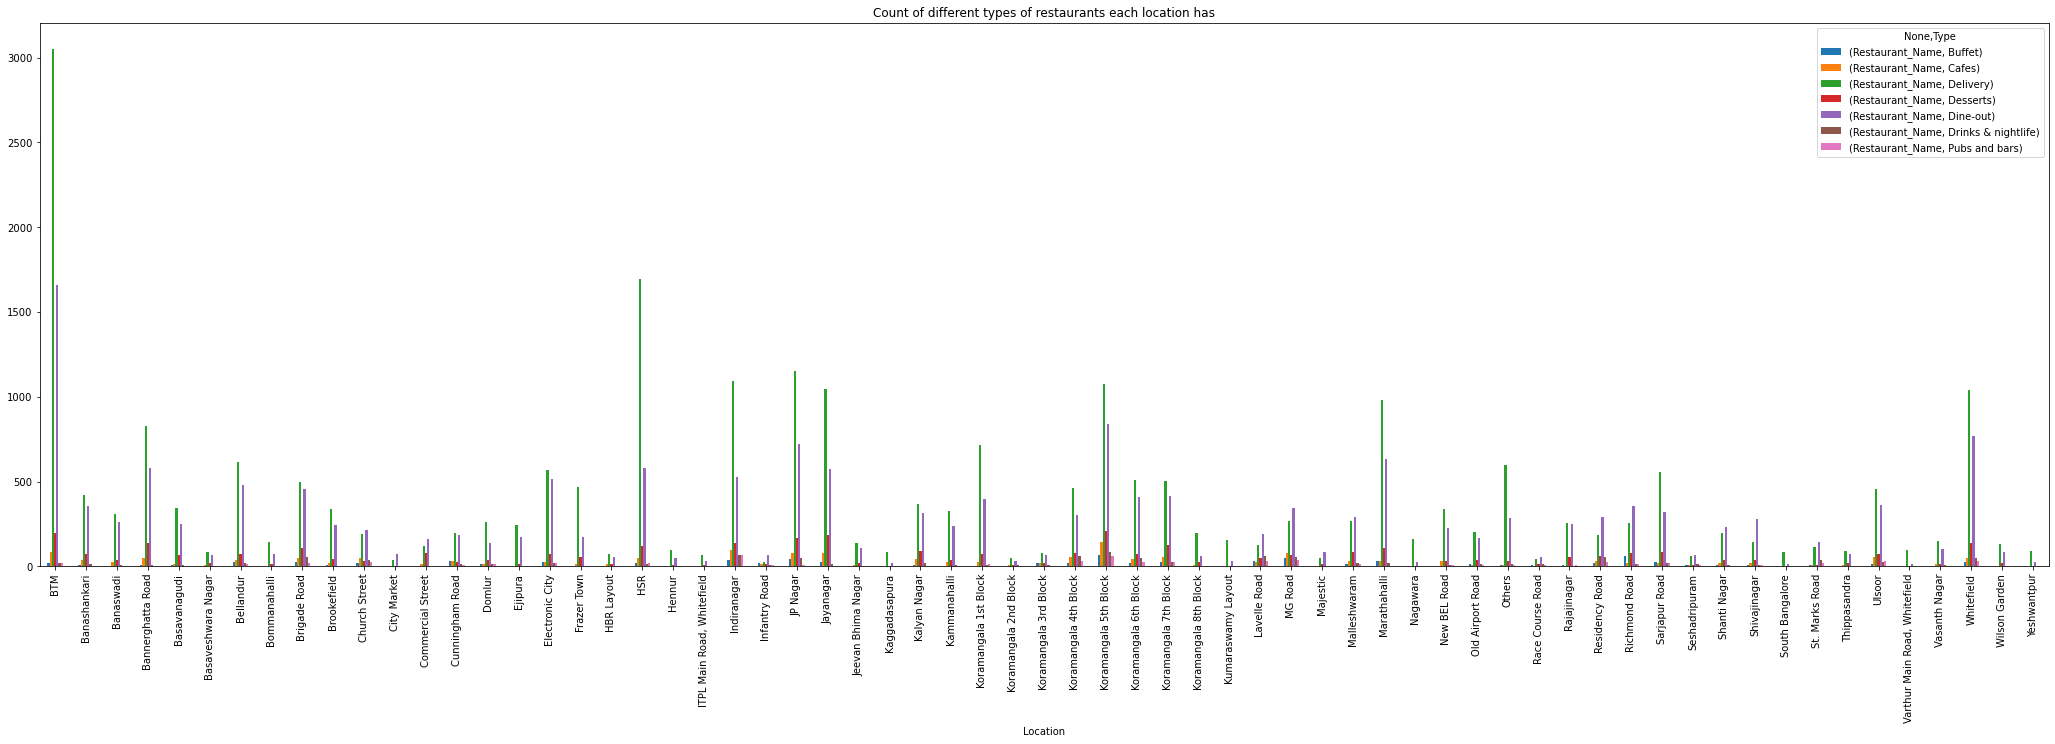

In [ ]:
loc_based_rest.plot(kind='bar',figsize=(36,10))
plt.title("Count of different types of restaurants each location has")

***From above, BTM has the maximum number of restaurants that have delivery & dine-out services , while really low number of restaurants for Drinks & nighlife or Pubs, so for better business these kind of restaurants can be launched in BTM as BTM is a residential area so it will get better business for such restaurants.***

### Feature Engineering

1. Extracting a new feature Performance, that will predict the performance of a new restaurant & classify it as Satisfactory, Very Good or Excellent.

2. For the current data, we have used Rating feature as the threshold to divide the performance of a restaurant into these 3 categories.

In [ ]:
# set threshold
def classify_performance(rate):
  if(rate<=3.5):
    return 'Satisfactory'
  elif(rate>3.5 and rate<3.8):
    return 'Very Good'
  else:
    return 'Excellent'
df['Performance'] = df['Rating'].apply(classify_performance)
df['Performance'].value_counts()

Excellent       20037
Very Good       16935
Satisfactory    14070
Name: Performance, dtype: int64

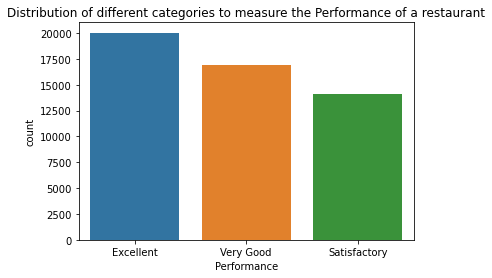

In [ ]:
sns.countplot(x ='Performance', data = df)
plt.title("Distribution of different categories to measure the Performance of a restaurant")
plt.show()

### Label Encoding:- to convert Performance to Numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Target'] = labelencoder.fit_transform(df['Performance'])
df.head()

,Restaurant_Name,Online_Order,Book_Table,Rating,Vote_Count,Location,Restaurant_Type,Cuisines,Cost_For_Two,Type,Performance,Target
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Excellent,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Excellent,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Excellent,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Very Good,2
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Excellent,0


### Extracting new features out of Cuisines & Restaurant Type

In [ ]:
# Extracting new features
df['Multiple_Types'] = df['Restaurant_Type'].astype(str).apply(lambda x: len(x.split(',')))
df['Cuisines_Offered'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')))

***The above code will generate new features that will have the number of services & cuisines a restaurant offers, which will contribute to the performance of a restaurant.***

In [ ]:
# dropping these features as we have gained valuable insights from them & are no longer needed for prediction
df.drop(['Restaurant_Type','Cuisines','Restaurant_Name','Location','Performance','Rating'],axis=1,inplace=True)
df.head()

,Online_Order,Book_Table,Vote_Count,Cost_For_Two,Type,Target,Multiple_Types,Cuisines_Offered
0,Yes,Yes,775,800.0,Buffet,0,1,3
1,Yes,No,787,800.0,Buffet,0,1,3
2,Yes,No,918,800.0,Buffet,0,2,3
3,No,No,88,300.0,Buffet,2,1,2
4,No,No,166,600.0,Buffet,0,1,2


###One-Hot Encoding:- 

***Converts all categorical data to numerical data to make it suitable for Model Fitting***

In [ ]:
df = pd.get_dummies(df, columns=['Online_Order','Book_Table','Type'])
df.head()

,Vote_Count,Cost_For_Two,Target,Multiple_Types,Cuisines_Offered,Online_Order_No,Online_Order_Yes,Book_Table_No,Book_Table_Yes,Type_Buffet,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
0,775,800.0,0,1,3,0,1,0,1,1,0,0,0,0,0,0
1,787,800.0,0,1,3,0,1,1,0,1,0,0,0,0,0,0
2,918,800.0,0,2,3,0,1,1,0,1,0,0,0,0,0,0
3,88,300.0,2,1,2,1,0,1,0,1,0,0,0,0,0,0
4,166,600.0,0,1,2,1,0,1,0,1,0,0,0,0,0,0


### Feature Selection

***The above dataset has the final set of features that we will be using to train models on & predict the performance of a restaurant based on the classes defined earlier.***

### Splitting Data into Train & Test:-

***Splitting data into train set for the model to learn patterns from it & test set for the trained model to make predictions on the unseen data***

In [ ]:
from sklearn.model_selection import train_test_split 
y = df['Target'] 
X = df.drop(columns = 'Target') 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=142) 
print("X_train shape : ",X_train.shape) 
print("y_train shape : ",y_train.shape) 
print("X_test shape : ",X_test.shape) 
print("y_test shape : ",y_test.shape)

X_train shape :  (38281, 15)
y_train shape :  (38281,)
X_test shape :  (12761, 15)
y_test shape :  (12761,)


In [ ]:
predicting_df = X_test.head(5)

In [ ]:
predicting_df

,Vote_Count,Cost_For_Two,Multiple_Types,Cuisines_Offered,Online_Order_No,Online_Order_Yes,Book_Table_No,Book_Table_Yes,Type_Buffet,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
48781,1260,1700.0,2,6,0,1,0,1,0,0,0,0,0,1,0
22346,6,150.0,2,1,0,1,1,0,0,0,1,0,0,0,0
8991,54,250.0,1,1,0,1,1,0,0,0,1,0,0,0,0
16987,558,1000.0,1,2,0,1,0,1,0,0,0,0,1,0,0
30501,8,300.0,1,6,0,1,1,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## CLASSIFICATION MODELS

### MODEL 1. LOGISTIC REGRESSION

### 1. a) Applying Gridsearch to get the best hyperparameters for Logistic regression model

In [ ]:
# Logistic Regression hyperparameters
logreg_param_grid = {'C': np.linspace(0.1, 10, 20),'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear', 'lbfgs'],
    'multi_class' : ['ovr']}

### 1. b) Finding the best hyperparameters

In [ ]:
log_reg=LogisticRegression(random_state=42)
grid_log_reg=GridSearchCV(log_reg,logreg_param_grid,cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_scaled,y_train)

print("THE BEST PARAMETERS FOR LOGISTIC REGRESSION MODEL ARE ",grid_log_reg.best_params_)

THE BEST PARAMETERS FOR LOGISTIC REGRESSION MODEL ARE  {'C': 8.957894736842105, 'class_weight': None, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


### 1. c) Fitting the best logistic regression model


In [ ]:
lgr = LogisticRegression(C=8.957894736842105 , class_weight = None, penalty = 'l2', random_state=42, solver='lbfgs', multi_class='ovr')
lgr.fit(X_train_scaled, y_train)
log_pred = lgr.predict(X_test_scaled)
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(lgr.score(X_train_scaled, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(lgr.score(X_test_scaled, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.60
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.59


### 1. d) Logistic Regression Confusion Matrix


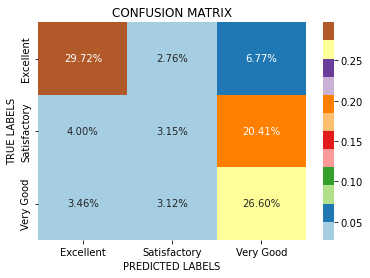

In [ ]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', ax=ax, cmap='Paired'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 1. e) Printing the classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.80      0.76      0.78      5009
Satisfactory       0.35      0.11      0.17      3518
   Very Good       0.49      0.80      0.61      4234

    accuracy                           0.59     12761
   macro avg       0.55      0.56      0.52     12761
weighted avg       0.57      0.59      0.56     12761



### 1. f) Final scores of the Logistic Regression model

In [ ]:
print('ACCURACY FOR THE LOGISTIC REGRESSION CLASSIFIER IS' , round(accuracy_score(y_test,log_pred)*100,4), "%")
print('PRECISON FOR THE LOGISTIC REGRESSION IS' , round(precision_score(y_test, log_pred,average='micro')*100,4), "%")
print('RECALL FOR THE LOGISTIC REGRESSION IS' , round(recall_score(y_test, log_pred,average='micro')*100,4), "%")
print('F1_SCORE FOR THE LOGISTIC REGRESSION IS' , round(f1_score(y_test,log_pred,average='micro')*100,4), "%")

ACCURACY FOR THE LOGISTIC REGRESSION CLASSIFIER IS 59.4703 %
PRECISON FOR THE LOGISTIC REGRESSION IS 59.4703 %
RECALL FOR THE LOGISTIC REGRESSION IS 59.4703 %
F1_SCORE FOR THE LOGISTIC REGRESSION IS 59.4703 %


### MODEL 2: DECISION TREE

### 2. a) Gridsearch to get the best hyperparamters for the decision tree

In [ ]:
tree_params = {'criterion': ['entropy', 'gini'],'max_depth': np.arange(2, 10, 1),'max_features': np.arange(1, X_train.shape[1]),'class_weight': ['balanced', None],'random_state': [42]}

### 2. b) Finding the best parameters for the Decision Tree

In [ ]:
tree_mod = GridSearchCV(estimator= DecisionTreeClassifier(random_state=42), param_grid=tree_params, cv= 5, scoring='accuracy')
tree_mod.fit(X_train, y_train)
print("THE BEST PARAMETERS FOR THE DECISION TREE MODEL ARE ",tree_mod.best_params_)

THE BEST PARAMETERS FOR THE DECISION TREE MODEL ARE  {'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 13, 'random_state': 42}


### 2. c) Fitting the best Decision tree model

In [ ]:
final_dec = DecisionTreeClassifier(criterion='gini' , class_weight = None, random_state=42, max_depth=9, max_features=13)
final_dec.fit(X_train, y_train)
dec_pred = final_dec.predict(X_test)
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(final_dec.score(X_train, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(final_dec.score(X_test, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.78
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.76


### 2. d) Confusion Matrix for the Decision Tree

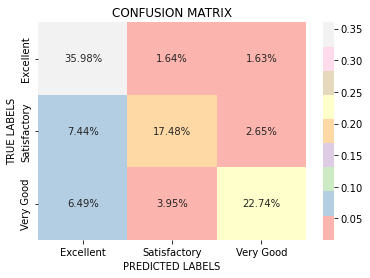

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, dec_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Pastel1'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);

### 2. e) Classification report for the Decision Tree

In [ ]:
print(classification_report(y_test, dec_pred , target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.72      0.92      0.81      5009
Satisfactory       0.76      0.63      0.69      3518
   Very Good       0.84      0.69      0.76      4234

    accuracy                           0.76     12761
   macro avg       0.77      0.75      0.75     12761
weighted avg       0.77      0.76      0.76     12761



### 2. f) Final scores for the Decision Tree model

In [ ]:
print('ACCURACY FOR THE DECISION TREE IS' , round(accuracy_score(y_test,dec_pred)*100,4), "%")
print('PRECISON FOR THE DECISION TREE IS' , round(precision_score(y_test, dec_pred,average='macro')*100,4), "%")
print('RECALL FOR THE DECISION TREE IS' , round(recall_score(y_test, dec_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE DECISION TREE IS' , round(f1_score(y_test,dec_pred,average='macro')*100,4), "%")

ACCURACY FOR THE DECISION TREE IS 76.2088 %
PRECISON FOR THE DECISION TREE IS 77.3484 %
RECALL FOR THE DECISION TREE IS 74.544 %
F1_SCORE FOR THE DECISION TREE IS 75.1067 %


### MODEL 3: RANDOM FOREST CLASSIFIER

### 3. a) Gridsearch to get the best hyperparameters for a Random Forest

In [ ]:
ran_parameters = {'max_depth': [3,5,10,11,12,15],'n_estimators': [50, 100, 200, 500],'random_state': [42],'max_features': ['auto', 'sqrt'],'class_weight': ['balanced', None]}

### 3. b) Getting the best hyperparameters

In [ ]:
ran_model = GridSearchCV(estimator= RandomForestClassifier(random_state=42), param_grid=ran_parameters, cv= 3, scoring='accuracy')
ran_model.fit(X_train, y_train)
print("THE BEST PARAMETERS FOR THE RANDOM FOREST MODEL ARE ",ran_model.best_params_)

THE BEST PARAMETERS FOR THE RANDOM FOREST MODEL ARE  {'class_weight': None, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 42}


### 3. c) Fitting the best Random Forest model

In [ ]:
final_ran = RandomForestClassifier(class_weight = None, random_state=42, max_depth=15, max_features='auto', n_estimators=200)
final_ran.fit(X_train, y_train)
ran_pred = final_ran.predict(X_test)
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(final_ran.score(X_train, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(final_ran.score(X_test, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.86
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.81


### 3. d) Confusion Matrix for the Random Forest

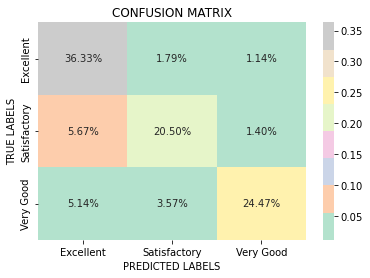

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, ran_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Pastel2'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 3. e) Classification Report for the Random Forest

In [ ]:
print(classification_report(y_test, ran_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.77      0.93      0.84      5009
Satisfactory       0.79      0.74      0.77      3518
   Very Good       0.91      0.74      0.81      4234

    accuracy                           0.81     12761
   macro avg       0.82      0.80      0.81     12761
weighted avg       0.82      0.81      0.81     12761



### 3. f) Performance scores

In [ ]:
print('ACCURACY FOR THE RANDOM FOREST IS' , round(accuracy_score(y_test,ran_pred)*100,4), "%")
print('PRECISON FOR THE RANDOM FOREST IS' , round(precision_score(y_test, ran_pred,average='macro')*100,4), "%")
print('RECALL FOR THE RANDOM FOREST IS' , round(recall_score(y_test, ran_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE RANDOM FOREST IS' , round(f1_score(y_test,ran_pred,average='macro')*100,4), "%")

ACCURACY FOR THE RANDOM FOREST IS 81.2946 %
PRECISON FOR THE RANDOM FOREST IS 82.3148 %
RECALL FOR THE RANDOM FOREST IS 80.2168 %
F1_SCORE FOR THE RANDOM FOREST IS 80.7158 %


### MODEL 4: NAIVE BAYE'S CLASSIFIER

### 4. a) Fitting a Gaussian Naive Bayes Classifer and cross validating the scores

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

NB = GaussianNB()
NB_cv = cross_val_score(NB, X_train, y_train, cv=KFold(n_splits=10), scoring='accuracy')
print('THE CROSS VALIDATION SCORE FOR NAIVE BAYES CLASSIFIER IS: ', NB_cv)

THE CROSS VALIDATION SCORE FOR NAIVE BAYES CLASSIFIER IS:  [0.49151214 0.4968652  0.50522466 0.48746082 0.50104493 0.50548589
 0.48876698 0.49242424 0.51018809 0.51201672]


### 4. b) Displaying the training and testing accuracies 

In [ ]:
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(NB.score(X_train, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(NB.score(X_test, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.50
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.50


### 4. c) Performance scores for Naive Bayes' Classifier

In [ ]:
print('ACCURACY FOR THE NAIVE BAYES CLASSIFIER IS' , round(accuracy_score(y_test,NB_pred)*100,4), "%")
print('PRECISON FOR THE NAIVE BAYES CLASSIFIER IS' , round(precision_score(y_test, NB_pred,average='macro')*100,4), "%")
print('RECALL FOR THE NAIVE BAYES CLASSIFIER IS' , round(recall_score(y_test, NB_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE NAIVE BAYES CLASSIFIER IS' , round(f1_score(y_test,NB_pred,average='macro')*100,4), "%")

ACCURACY FOR THE NAIVE BAYES CLASSIFIER IS 49.9882 %
PRECISON FOR THE NAIVE BAYES CLASSIFIER IS 56.0229 %
RECALL FOR THE NAIVE BAYES CLASSIFIER IS 51.0628 %
F1_SCORE FOR THE NAIVE BAYES CLASSIFIER IS 50.1939 %


### 4. d) Confusion Matrix for Naive Bayes Classifier

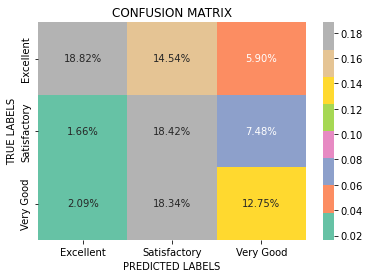

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Set2'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 4. e) Classification Report for Naive Bayes' Classifier

In [ ]:
print(classification_report(y_test, NB_pred,target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.83      0.48      0.61      5009
Satisfactory       0.36      0.67      0.47      3518
   Very Good       0.49      0.38      0.43      4234

    accuracy                           0.50     12761
   macro avg       0.56      0.51      0.50     12761
weighted avg       0.59      0.50      0.51     12761



### MODEL 5: ARTIFICIAL NEURAL NETWORK

### 5. a) Grid Search over MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
Mlp_parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.0002, 0.0003],
    'learning_rate': ['constant','adaptive']
}

### 5. b) Finding the best hyperparamters

In [ ]:
clf = GridSearchCV(mlp, Mlp_parameters, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, y_train)
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0003,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

### 5. c) Fitting the MLP classifier with the best hyperparameters

In [ ]:
mlp_final = MLPClassifier(max_iter=100, activation='tanh'
                   ,alpha=0.0001
                   , hidden_layer_sizes=(50,50,50)
                   , learning_rate='constant'
                   ,solver='adam')
mlp_final.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=100)

### 5. d) Making predictions 

In [ ]:
mlp_pred = mlp_final.predict(X_test_scaled)

### 5. e) Checking the Training and Testing accuracies

In [ ]:
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(mlp_final.score(X_train_scaled, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(mlp_final.score(X_test_scaled, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.75
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.63


### 5. f) Performance scores

In [ ]:
print('ACCURACY FOR THE MLP CLASSIFIER IS' , round(accuracy_score(y_test,mlp_pred)*100,4), "%")
print('PRECISON FOR THE MLP CLASSIFIER IS' , round(precision_score(y_test, mlp_pred,average='macro')*100,4), "%")
print('RECALL FOR THE MLP CLASSIFIER IS' , round(recall_score(y_test, mlp_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE MLP CLASSIFIER IS' , round(f1_score(y_test,mlp_pred,average='macro')*100,4), "%")

ACCURACY FOR THE MLP CLASSIFIER IS 62.7929 %
PRECISON FOR THE MLP CLASSIFIER IS 57.8924 %
RECALL FOR THE MLP CLASSIFIER IS 58.8923 %
F1_SCORE FOR THE MLP CLASSIFIER IS 56.4514 %


### 5. g) Confusion Matrix for the MLP Classifier

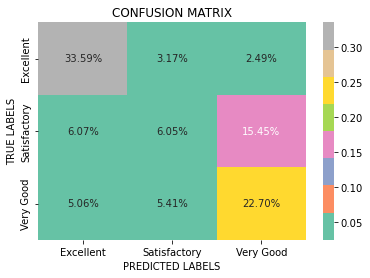

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, mlp_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Set2'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 5. h) Classification Report for the MLP Classifier 

In [ ]:
print(classification_report(y_test, mlp_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.75      0.86      0.80      5009
Satisfactory       0.41      0.22      0.29      3518
   Very Good       0.56      0.68      0.62      4234

    accuracy                           0.62     12761
   macro avg       0.57      0.59      0.57     12761
weighted avg       0.59      0.62      0.60     12761



### MODEL 6: K-NEAREST NEIGHBOURS CLASSIFIER

### 6. a) Grid search to get the best hyperparameters for KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_parameters = {
    'n_neighbors': list(range(1, 30)),
    'p': [1, 2]
}

### 6. b) Finding the best Hyperparameters

In [ ]:
knn = KNeighborsClassifier()
knn_gd = GridSearchCV(knn, knn_parameters, cv=5, scoring='accuracy')
knn_search=knn_gd.fit(X_train_scaled, y_train)

### 6. c) Fitting the best model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors= 12, p=1)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

### 6. d) Making predictions

In [ ]:
knn_pred = knn_model.predict(X_test_scaled)

### 6. e) Printing the training and testing accuracies

In [ ]:
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(knn_model.score(X_train_scaled, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(knn_model.score(X_test_scaled, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.79
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.62


### 6. f) Performance Scores for KNN classifier

In [ ]:
print('ACCURACY FOR THE KNN CLASSIFIER IS' , round(accuracy_score(y_test,knn_pred)*100,4), "%")
print('PRECISON FOR THE KNN CLASSIFIER IS' , round(precision_score(y_test, knn_pred,average='macro')*100,4), "%")
print('RECALL FOR THE KNN CLASSIFIER IS' , round(recall_score(y_test, knn_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE KNN CLASSIFIER IS' , round(f1_score(y_test,knn_pred,average='macro')*100,4), "%")

ACCURACY FOR THE KNN CLASSIFIER IS 62.2835 %
PRECISON FOR THE KNN CLASSIFIER IS 59.1927 %
RECALL FOR THE KNN CLASSIFIER IS 59.4249 %
F1_SCORE FOR THE KNN CLASSIFIER IS 58.6757 %


### 6. g) Confusion Matrix for KNN Classifier

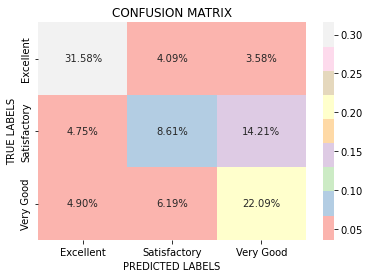

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Pastel1'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 6. h) Classification Report for KNN Classifier

In [ ]:
print(classification_report(y_test, knn_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.77      0.80      0.78      5009
Satisfactory       0.46      0.31      0.37      3518
   Very Good       0.55      0.67      0.60      4234

    accuracy                           0.62     12761
   macro avg       0.59      0.59      0.59     12761
weighted avg       0.61      0.62      0.61     12761



### MODEL 7: ADABOOST Classifier

### 7. a) Applying Grid search for getting the best Hyperparameters

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_parameters = {'n_estimators' : [10, 50, 100, 500]
,'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

ada_model = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=adaboost_parameters, n_jobs=-1, cv=5, scoring='accuracy')
ada_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

### 7. b) Finding the best hyperparameters

In [ ]:
print(ada_model.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500}


### 7. c) Fitting the best Adaboost model

In [ ]:
ada_final = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ada_final.fit(X_train, y_train)
ada_pred = ada_final.predict(X_test) 

### 7. d) Training and Testing accuracies

In [ ]:
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(ada_final.score(X_train, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(ada_final.score(X_test, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.76
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.75


### 7. e) Performance scores for ADABOOST Classifier

In [ ]:
print('ACCURACY FOR THE ADABOOST CLASSIFIER IS' , round(accuracy_score(y_test,ada_pred)*100,4), "%")
print('PRECISON FOR THE ADABOOST CLASSIFIER IS' , round(precision_score(y_test, ada_pred,average='macro')*100,4), "%")
print('RECALL FOR THE ADABOOST CLASSIFIER IS' , round(recall_score(y_test, ada_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE ADABOOST CLASSIFIER IS' , round(f1_score(y_test,ada_pred,average='macro')*100,4), "%")

ACCURACY FOR THE ADABOOST CLASSIFIER IS 74.5945 %
PRECISON FOR THE ADABOOST CLASSIFIER IS 76.6378 %
RECALL FOR THE ADABOOST CLASSIFIER IS 73.2493 %
F1_SCORE FOR THE ADABOOST CLASSIFIER IS 73.5087 %


### 7. f) Confusion Matrix for the Adaboost Classifier

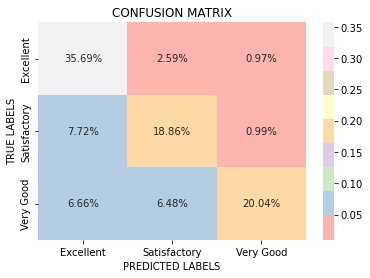

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, ada_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Pastel1'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);


### 7. g) Classification Report

In [ ]:
print(classification_report(y_test, ada_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.71      0.91      0.80      5009
Satisfactory       0.68      0.68      0.68      3518
   Very Good       0.91      0.60      0.73      4234

    accuracy                           0.75     12761
   macro avg       0.77      0.73      0.74     12761
weighted avg       0.77      0.75      0.74     12761



### MODEL 8: XGBOOST CLASSIFIER

### 8. a) Grid Search for getting the best hyperparameters for XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_parameters = {
        'n_estimators': [100, 500, 1000],
        'gamma': [0.5, 1, 1.5, 2, 5]}

### 8. b) Finding the best parameters

In [ ]:
xgb = XGBClassifier()
xgb_search = GridSearchCV(xgb, param_grid=xgb_parameters, scoring='accuracy', n_jobs=4, cv=5, verbose=3 )
xgb_search.fit(X_train, y_train)
xgb_search.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'gamma': 0.5, 'n_estimators': 500}

### 8. c) Fitting the best model

In [ ]:
xgb_final = XGBClassifier(n_estimators=1000,gamma=0.5)
xgb_final.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

### 8. d) Making Predictions

In [ ]:
xgb_pred = xgb_final.predict(X_test)

### 8. e) Training and Testing accuracies

In [ ]:
print('THE ACCURACY OF THE MODEL ON THE TRAINING SET: {:.2f}'.format(xgb_final.score(X_train, y_train)))
print('THE ACCURACY OF THE MODEL ON THE TEST SET: {:.2f}'.format(xgb_final.score(X_test, y_test)))

THE ACCURACY OF THE MODEL ON THE TRAINING SET: 0.83
THE ACCURACY OF THE MODEL ON THE TEST SET: 0.80


### 8. f) Performance scores for XGBOOST Classifier

In [ ]:
print('ACCURACY FOR THE XGBOOST CLASSIFIER IS' , round(accuracy_score(y_test,xgb_pred)*100,4), "%")
print('PRECISON FOR THE XGBOOST CLASSIFIER IS' , round(precision_score(y_test, xgb_pred,average='macro')*100,4), "%")
print('RECALL FOR THE XGBOOST CLASSIFIER IS' , round(recall_score(y_test, xgb_pred,average='macro')*100,4), "%")
print('F1_SCORE FOR THE XGBOOST CLASSIFIER IS' , round(f1_score(y_test,xgb_pred,average='macro')*100,4), "%")

ACCURACY FOR THE XGBOOST CLASSIFIER IS 79.5157 %
PRECISON FOR THE XGBOOST CLASSIFIER IS 80.1421 %
RECALL FOR THE XGBOOST CLASSIFIER IS 78.3987 %
F1_SCORE FOR THE XGBOOST CLASSIFIER IS 78.7922 %


### 8. g) Confusion Matrix for XGBoost Classifier

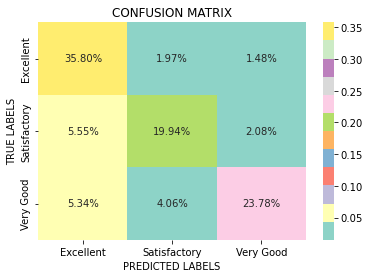

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', ax=ax, cmap='Set3'); 
ax.set_xlabel('PREDICTED LABELS');ax.set_ylabel('TRUE LABELS'); 
ax.set_title('CONFUSION MATRIX'); 
ax.xaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);
ax.yaxis.set_ticklabels(['Excellent', 'Satisfactory', 'Very Good']);

### 8. h) Classification Report for XGBoost Classifier

In [ ]:
print(classification_report(y_test, xgb_pred, target_names=['Excellent', 'Satisfactory', 'Very Good']))

              precision    recall  f1-score   support

   Excellent       0.77      0.91      0.83      5009
Satisfactory       0.77      0.72      0.74      3518
   Very Good       0.87      0.72      0.79      4234

    accuracy                           0.80     12761
   macro avg       0.80      0.78      0.79     12761
weighted avg       0.80      0.80      0.79     12761



### Dataframe for comparison among the Classifiers

In [ ]:
accuracy_scores = {
    "Classification Algorithm": ["Logistic Regression" , "Decision Tree Classifier", "Random Forest Classifier"
                                       ,"Naive Bayes Classifier", "Artificial Neural Network", "KNN Classifier", 
                                "Adaboost Classifier", "XGBoost Classifier"],
    "Accuracy": [round(accuracy_score(y_test,log_pred)*100,4)
                         ,round(accuracy_score(y_test,dec_pred)*100,4)
                         ,round(accuracy_score(y_test,ran_pred)*100,4)
                         ,round(accuracy_score(y_test,NB_pred)*100,4)
                         ,round(accuracy_score(y_test,mlp_pred)*100,4)
                         ,round(accuracy_score(y_test,knn_pred)*100,4)
                        ,round(accuracy_score(y_test,ada_pred)*100,4)
                        ,round(accuracy_score(y_test,xgb_pred)*100,4)],

    "Precision": [round(precision_score(y_test,log_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,dec_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,ran_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,NB_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,mlp_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,knn_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,ada_pred, average='macro')*100,4)
                         ,round(precision_score(y_test,xgb_pred, average='macro')*100,4)],

    "Recall": [round(recall_score(y_test,log_pred, average='macro')*100,4)
                         ,round(recall_score(y_test,dec_pred, average='macro')*100,4)
                         ,round(recall_score(y_test,ran_pred, average='macro')*100,4)
                         ,round(recall_score(y_test,NB_pred, average='macro')*100,4)
                         ,round(recall_score(y_test,mlp_pred, average='macro')*100,4)
                         ,round(recall_score(y_test,knn_pred, average='macro')*100,4)
                          ,round(recall_score(y_test,ada_pred, average='macro')*100,4)
                          ,round(recall_score(y_test,xgb_pred, average='macro')*100,4)],

    "F1 Score": [round(f1_score(y_test,log_pred, average='macro')*100,4)
                         ,round(f1_score(y_test,dec_pred, average='macro')*100,4)
                         ,round(f1_score(y_test,ran_pred, average='macro')*100,4)
                         ,round(f1_score(y_test,NB_pred, average='macro')*100,4)
                         ,round(f1_score(y_test,mlp_pred, average='macro')*100,4)
                         ,round(f1_score(y_test,knn_pred, average='macro')*100,4)
                        ,round(f1_score(y_test,ada_pred, average='macro')*100,4)
                        ,round(f1_score(y_test,xgb_pred, average='macro')*100,4)],
    
                  }
compare = pd.DataFrame(accuracy_scores)
compare

,Classification Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,59.4703,54.7565,55.7704,52.0504
1,Decision Tree Classifier,76.2088,77.3484,74.5440,75.1067
2,Random Forest Classifier,81.2946,82.3148,80.2168,80.7158
3,Naive Bayes Classifier,49.9882,56.0229,51.0628,50.1939
4,Artificial Neural Network,62.3384,57.4309,58.6442,56.7226
5,KNN Classifier,62.2835,59.1927,59.4249,58.6757
6,Adaboost Classifier,74.5945,76.6378,73.2493,73.5087
7,XGBoost Classifier,79.5157,80.1421,78.3987,78.7922


### AUC_ROC CURVE:-

***Visualizing the performance of the multi-class classification models using auc_roc curve***

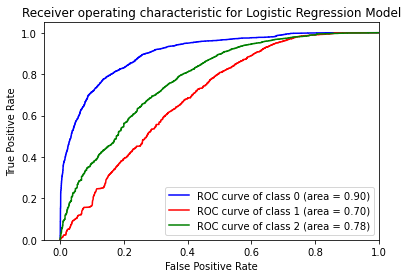

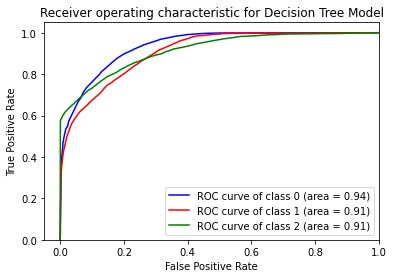

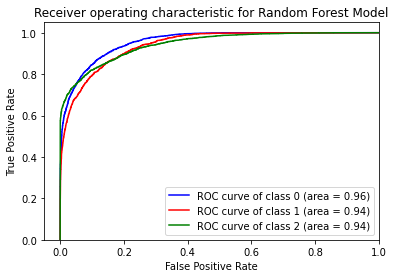

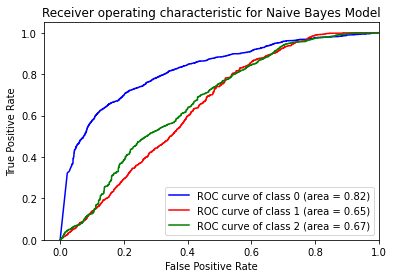

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc,roc_auc_score

## ROC for Logistic Regression
y_test_bin = label_binarize(y_test,classes = np.unique(y_test))
n_classes = len(lgr.classes_)
y_score = lgr.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()



## ROC for Decision Tree
n_classes = len(final_dec.classes_)
y_score = final_dec.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()



## ROC for Random Forest
n_classes = len(final_ran.classes_)
y_score = final_ran.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest Model')
plt.legend(loc="lower right")
plt.show()




## ROC for Naive Bayes
n_classes = len(NB.classes_)
y_score = NB.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

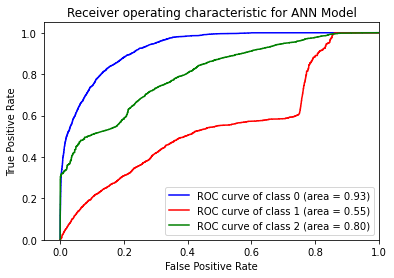

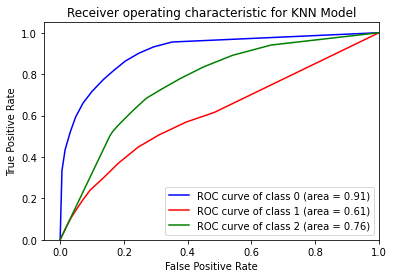

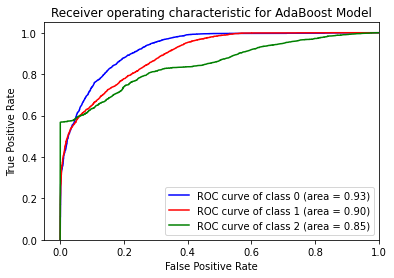

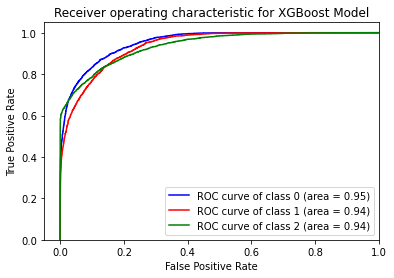

In [ ]:
## ROC for ANN
n_classes = len(mlp_final.classes_)
y_score = mlp_final.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for ANN Model')
plt.legend(loc="lower right")
plt.show()




## ROC for KNN
n_classes = len(knn_model.classes_)
y_score = knn_model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for KNN Model')
plt.legend(loc="lower right")
plt.show()



## ROC for Adaboost
n_classes = len(ada_final.classes_)
y_score = ada_final.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for AdaBoost Model')
plt.legend(loc="lower right")
plt.show()



## ROC for XGBoost
n_classes = len(xgb_final.classes_)
y_score = xgb_final.fit(X_train, y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

### Testing the Best Classifier (Random Forest)

In [ ]:
best_pred = final_ran.predict(predicting_df)
predicting_df['Prediction'] = best_pred

In [ ]:
predicting_df['Prediction']

48781    0
22346    1
8991     1
16987    0
30501    1
Name: Prediction, dtype: int32

### Mapping with the original dataset
***To merge with the original dataset, we need to perform some pre-processing***

In [ ]:
new_df['Cost_For_Two'] = new_df['Cost_For_Two'].apply(clean_cost)
new_df["Cost_For_Two"] = new_df["Cost_For_Two"].astype(float)

In [ ]:
new_df['Cost_For_Two'].unique()
new_df['Restaurant_Name'] = new_df['Restaurant_Name'].astype(str)
new_df['Online_Order'] = new_df['Online_Order'].astype(str)

In [ ]:
new_df['Restaurant_Name'] = new_df['Restaurant_Name'].str.strip()
new_df['Online_Order'] = new_df['Online_Order'].str.strip()

### Inner Join on the original dataset
***Inner Join will compute the values from both the datasets that match when the keys to peform the join are "Vote_Count" and "Cost_For_Two***

In [ ]:
df2 = pd.merge(new_df,predicting_df,   how='inner', left_on=['Vote_Count','Cost_For_Two'], right_on = ['Vote_Count','Cost_For_Two'])
df2 = pd.DataFrame(df2)

def classify_prediction(pred):
    if(pred == 1):
        return 'Satisfactory'
    elif (pred ==2):
        return 'Very Good'
    else:
        return 'Excellent'

df2['Performance'] = df2['Prediction_y'].apply(classify_prediction)
df2['Performance'].value_counts()

Satisfactory    173
Excellent         3
Name: Performance, dtype: int64

### Predicting the Success of 5 random Restaraunts 

In [ ]:
pred = df2[["Restaurant_Name", "Prediction_y", "Performance"]]
pred.sample(n=5)

,Restaurant_Name,Prediction_y,Performance
158,b'Snakk That',1,Satisfactory
16,b'Mangalore Lunch Home',1,Satisfactory
154,b'Moti Mahal Delux',0,Excellent
83,b'Oyalo',1,Satisfactory
106,b'Estaa Sweets',1,Satisfactory


### Results
1. *Random Forest has the best predictive performance among all the classification models applied.*
2. *Therefore, we are using Random Forest classifier to predict the success of some random restaraunts to test our model whose resuts are shown in the above table.*


### Conclusion

1. *As we can see from above roc-auc plots, Random Forest model has the highest roc scores for all 3 classes which tells us how well the model is classifying each class. This model is working well for all 3 classes.*
2. *As compared above, Random Forest has the best accuracy i.e 81% , the best precision,recall scores i.e nearly 81% and roc_auc scores above 94% for each class which is the highest when compared with other classification models, so we finalize Random Forest as our Classifier to further predict the performance of a new restaurant.*
